In [270]:
import rdkit.Chem as Chem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole # Enables RDKit IPython integration]
import pandas as pd

# PDBe scaffold analysis

In [271]:
df = pd.read_csv('scaffold_count.csv')

In [272]:
df.head()

,SMILES,COUNT(*)
0,c1ccccc1,1929
1,C1CCOCC1,559
2,c1ncc2ncn([C@H]3CCCO3)c2n1,256
3,c1ccncc1,238
4,c1ncc2ncn([C@@H]3CCCO3)c2n1,227


In [273]:
df['SMILES'].nunique()

13893

In [274]:
smiles = 'SMILES'
count = 'COUNT(*)'
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='SMILES')
df_romol = df[[smiles, count, 'ROMol']]

RDKit WARNING: [11:22:03] WARNING: could not find number of expected rings. Switching to an approximate ring finding algorithm.


,SMILES,COUNT(*),ROMol
0,c1ccccc1,1929,
1,C1CCOCC1,559,
2,c1ncc2ncn([C@H]3CCCO3)c2n1,256,
3,c1ccncc1,238,
4,c1ncc2ncn([C@@H]3CCCO3)c2n1,227,
5,C1CCCCC1,221,
6,c1ccc(-c2ccccc2)cc1,176,
7,c1ccc2[nH]ccc2c1,166,
8,c1ccc2ccccc2c1,129,
9,O=c1ccn([C@H]2CCCO2)c(=O)[nH]1,116,

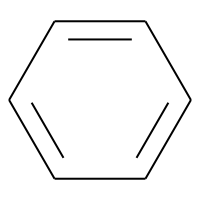
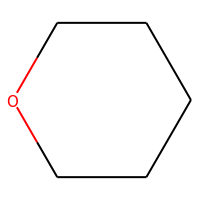
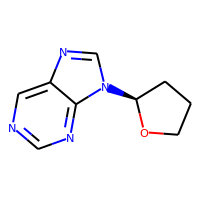
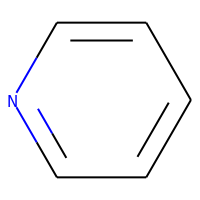
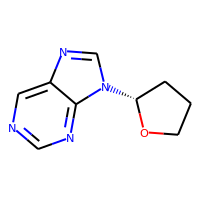
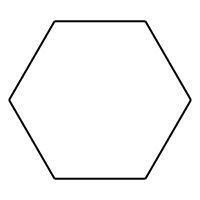
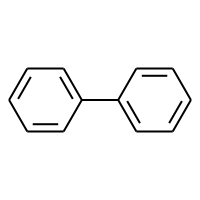
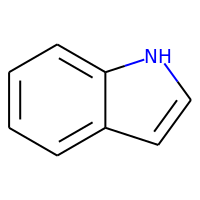
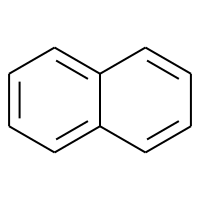
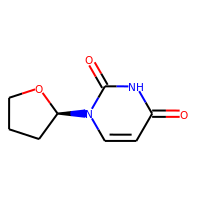
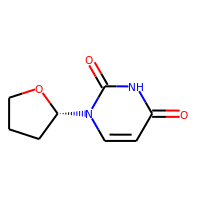
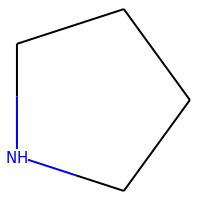
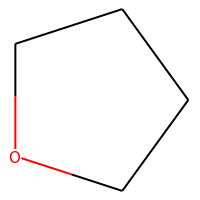
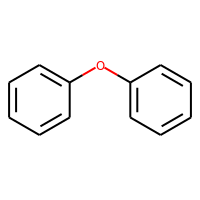
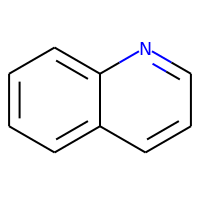
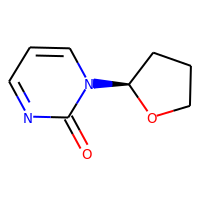
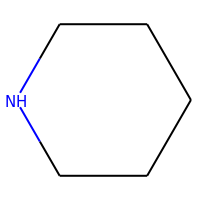
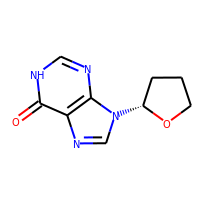
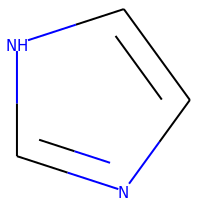
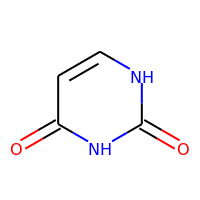
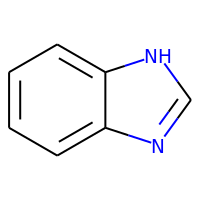
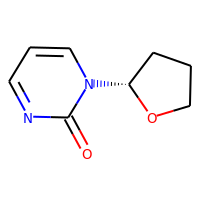
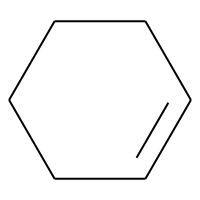
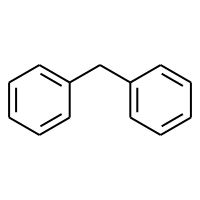
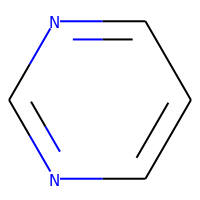

In [275]:
df.head(25)

In [276]:
def create_25_mol(df):
    smiles = df['SMILES'].tolist()
    top25_scaffolds = smiles[0:25]
    top_25_mol = [Chem.MolFromSmiles(x) for x in top25_scaffolds]
    return top_25_mol
    
    

In [277]:
def create_25_label(df):
    scaffold_count = df['COUNT(*)']
    top25_scffold_count = scaffold_count[0:25]
    top_25_count_label = list(map(lambda l: str(l), top25_scffold_count))
    return top_25_count_label
    
    
    

# top 25 scaffolds in PDBe

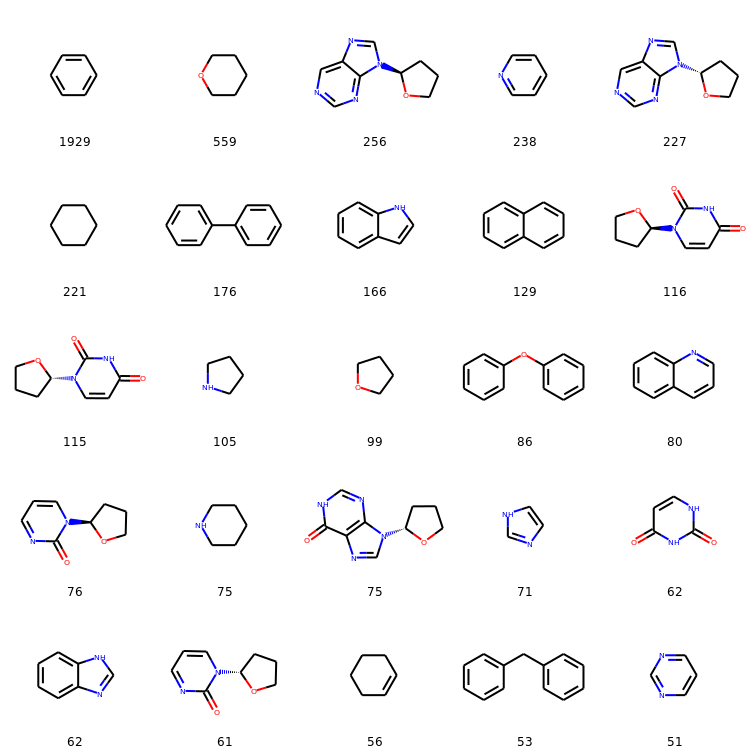

In [278]:
Draw.MolsToGridImage(create_25_mol(df), molsPerRow=5, subImgSize=(150,150), legends = create_25_label(df))

# PDBe fragment analysis

In [279]:
df_frag = pd.read_csv('fragment_unique_count.csv')

In [280]:
df_frag['SMILES'].nunique()

81

# top 25 fragments in ccd

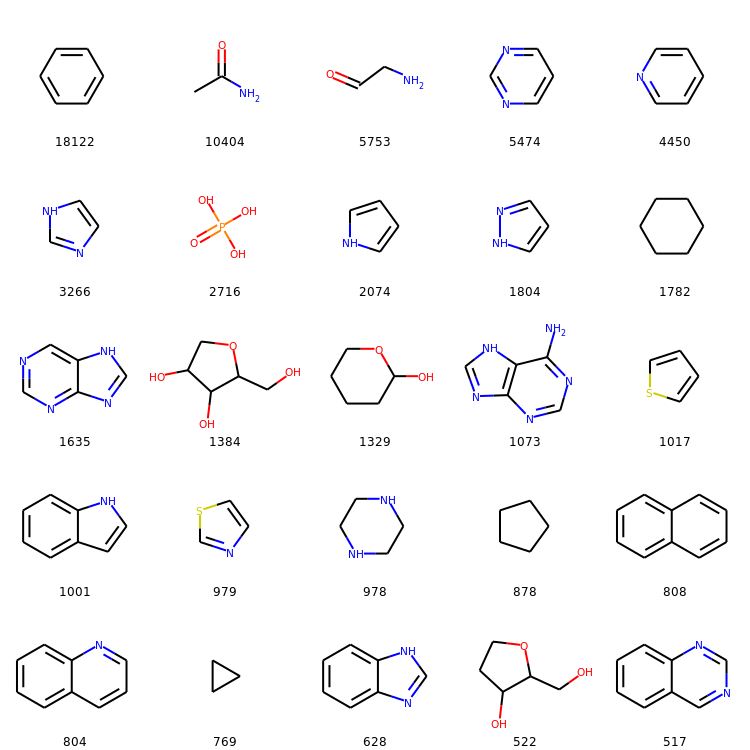

In [281]:
Draw.MolsToGridImage(create_25_mol(df_frag), molsPerRow=5, subImgSize=(150,150), legends = create_25_label(df_frag))

# CCD phys chem property analysis

In [282]:
df_prop = pd.read_csv('ccd_properties_clean.csv')

In [283]:
df_prop.dropna(inplace=True)
df_prop.head()

,CHEM_COMP_ID,Total Molweight,cLogP,H-Acceptors,H-Donors,Druglikeness,Rings
0,ZZZ,195.181,-2.5272,7.0,4.0,1.3220,2.0
1,ZZY,346.322,-0.7625,9.0,1.0,-5.2566,3.0
2,ZZX,461.880,1.5847,9.0,2.0,8.4262,4.0
3,ZZW,335.337,2.6308,5.0,2.0,0.7300,4.0
4,ZZV,415.444,1.2663,7.0,1.0,5.4555,4.0


In [284]:
df_prop.describe()

,Total Molweight,cLogP,H-Acceptors,H-Donors,Druglikeness,Rings
count,21971.000000,21971.000000,21971.000000,21971.000000,21971.000000,21971.000000
mean,366.619527,0.472065,7.132675,2.935142,-6.164656,2.657093
std,180.240081,3.937499,4.650156,2.332769,12.247612,2.405147
min,12.011000,-27.439000,0.000000,0.000000,-125.430000,0.000000
25%,237.854500,-1.545200,4.000000,1.000000,-9.475900,1.000000
50%,347.223000,1.208200,6.000000,2.000000,-2.066700,3.000000
75%,457.471500,2.989500,9.000000,4.000000,1.406050,4.000000
max,2141.460000,22.457000,59.000000,40.000000,17.076000,91.000000


In [285]:
import seaborn as sns

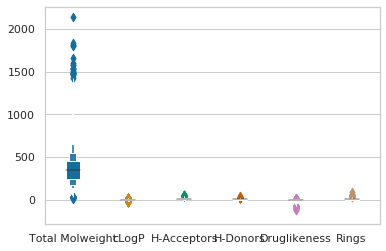

In [286]:
bplot = sns.boxenplot( 
                 data=df_prop, 
                 width=0.25,
                    linewidth=2.5,
                 palette="colorblind")

# Clustering based on Phys Chem properties

In [287]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics.cluster import silhouette_score

In [288]:
df_prop.head()

,CHEM_COMP_ID,Total Molweight,cLogP,H-Acceptors,H-Donors,Druglikeness,Rings
0,ZZZ,195.181,-2.5272,7.0,4.0,1.3220,2.0
1,ZZY,346.322,-0.7625,9.0,1.0,-5.2566,3.0
2,ZZX,461.880,1.5847,9.0,2.0,8.4262,4.0
3,ZZW,335.337,2.6308,5.0,2.0,0.7300,4.0
4,ZZV,415.444,1.2663,7.0,1.0,5.4555,4.0


In [289]:
df_prop_numeric = df_prop.drop(columns=['CHEM_COMP_ID'])
df_prop_numeric.head()

,Total Molweight,cLogP,H-Acceptors,H-Donors,Druglikeness,Rings
0,195.181,-2.5272,7.0,4.0,1.3220,2.0
1,346.322,-0.7625,9.0,1.0,-5.2566,3.0
2,461.880,1.5847,9.0,2.0,8.4262,4.0
3,335.337,2.6308,5.0,2.0,0.7300,4.0
4,415.444,1.2663,7.0,1.0,5.4555,4.0


In [290]:
def pairplot_cluster(df, cols, cluster_assignment):
    """
    df: dataframe that contains the data to plot 
    cols: columns to consider for the plot
    cluster_assignments: cluster asignment returned by the clustering algorithm
    """
    # seaborn will color the samples according to the column cluster
    df['cluster'] = cluster_assignment 
    sns.pairplot(df, vars=cols, hue='cluster')
    df.drop('cluster', axis=1, inplace=True)

In [291]:
kmeans = KMeans(n_clusters = 2)


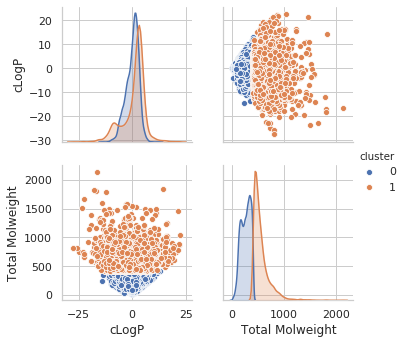

In [292]:
kmeans.fit(df_prop_numeric)
cluster_assignment = kmeans.predict(df_prop_numeric)

# Visualise the clusters using pairplot_cluster()
pairplot_cluster(df_prop_numeric, 
                 ['cLogP', 'Total Molweight'], 
                 cluster_assignment)

# Chem phys property analysis of Drug like subset of CCD

In [264]:
ccd_drug_prop = pd.read_csv('ccd_drug_prop.csv')

In [266]:
ccd_drug_prop.describe()

,Total Molweight,cLogP,H-Acceptors,H-Donors,Druglikeness,Rings
count,12419.000000,12419.000000,12419.000000,12419.000000,12419.000000,12419.000000
mean,346.580927,1.095843,6.398985,2.526210,-4.189611,2.644094
std,158.017230,3.373077,3.906728,1.997063,10.332629,1.613652
min,28.010000,-24.981000,0.000000,0.000000,-118.990000,0.000000
25%,230.660500,-0.229550,4.000000,1.000000,-6.548650,1.000000
50%,337.349000,1.678800,6.000000,2.000000,-1.354900,3.000000
75%,435.486000,3.169900,8.000000,3.000000,1.936300,4.000000
max,1794.920000,22.085000,52.000000,24.000000,17.076000,14.000000


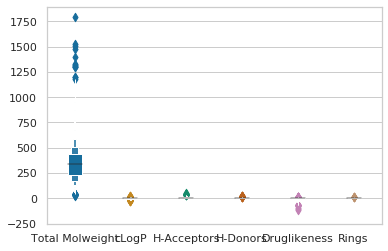

In [267]:
bplot = sns.boxenplot( 
                 data=ccd_drug_prop, 
                 width=0.25,
                    linewidth=2.5,
                 palette="colorblind")

In [268]:
ccd_drug_prop_numeric = ccd_drug_prop.drop(columns=['CHEM_COMP_ID'])

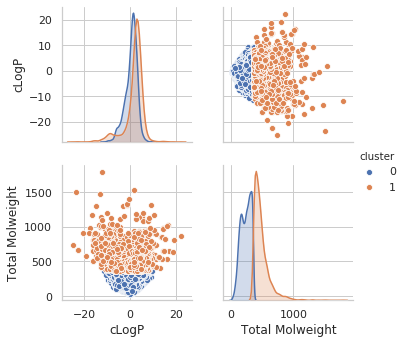

In [269]:
kmeans.fit(ccd_drug_prop_numeric)
cluster_assignment = kmeans.predict(ccd_drug_prop_numeric)

# Visualise the clusters using pairplot_cluster()
pairplot_cluster(ccd_drug_prop_numeric, 
                 ['cLogP', 'Total Molweight'], 
                 cluster_assignment)

# Drug like subset of CCD (mcule+drugbank+chembl+drugcentral)- Scaffolds

In [293]:
drug_like_scaffold = pd.read_csv('drug_like_scaffold.csv')

In [294]:
drug_like_scaffold.head()

,CHEM_COMP_ID,SMILES
0,SU0,O=C(Cc1cc(=O)oc2ccccc12)Nc1ccccc1
1,SU0,O=C(Cc1cc(=O)oc2ccccc12)Nc1ccccc1
2,TRI,c1nnc[nH]1
3,X0T,O=c1[nH]c(=O)c2[nH]cnc2[nH]1
4,CBL,c1ccccc1


In [295]:
sorted_data_scaffold = drug_like_scaffold.groupby(['SMILES']).count().sort_values('CHEM_COMP_ID', ascending= False)

sortedScaffolds_drug = sorted_data_scaffold.rename(columns={'CHEM_COMP_ID':'COUNT(*)'}).reset_index()

In [296]:
sortedScaffolds_drug.head()

,SMILES,COUNT(*)
0,c1ccccc1,1116
1,C1CCOCC1,179
2,c1ccncc1,113
3,c1ccc2[nH]ccc2c1,101
4,c1ncc2ncn([C@@H]3CCCO3)c2n1,96


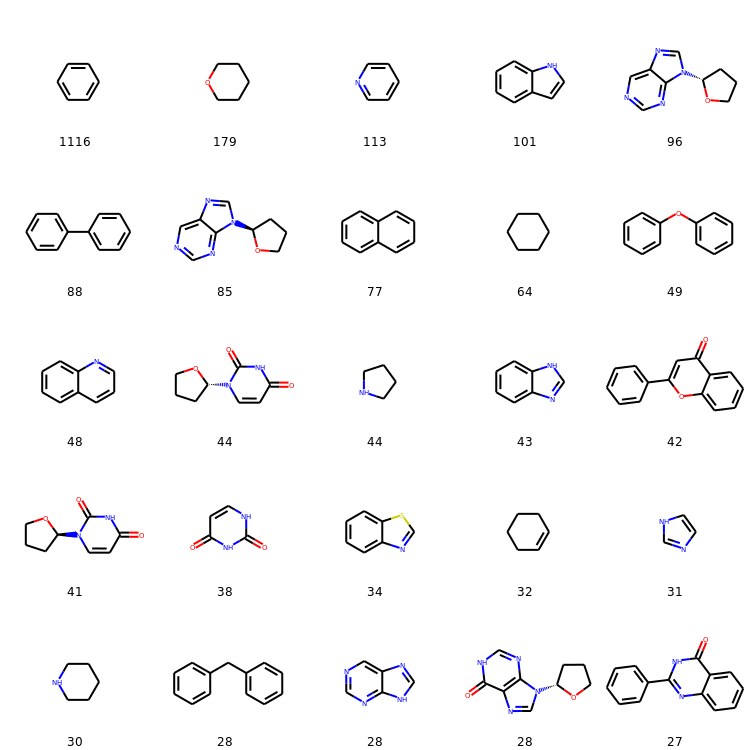

In [297]:
Draw.MolsToGridImage(create_25_mol(sortedScaffolds_drug), molsPerRow=5, subImgSize=(150,150), 
                     legends = create_25_label(sortedScaffolds_drug))


# Drug like subset of CCD (mcule+drugbank+chembl+drugcentral)- fragments

In [298]:
drug_like_fragment = pd.read_csv('drug_like_fragment.csv')

In [299]:
sorted_data_fragment = drug_like_fragment.groupby(['SMILES']).count().sort_values('CHEM_COMP_ID', ascending= False)

sortedfragments_drug = sorted_data_fragment.rename(columns={'CHEM_COMP_ID':'COUNT(*)'}).reset_index()

In [300]:
sortedfragments_drug.head()

,SMILES,Unnamed: 0,COUNT(*)
0,c1ccccc1,9223,9223
1,CC(N)=O,4494,4494
2,c1cncnc1,2457,2457
3,NCC=O,2257,2257
4,c1ccncc1,2192,2192


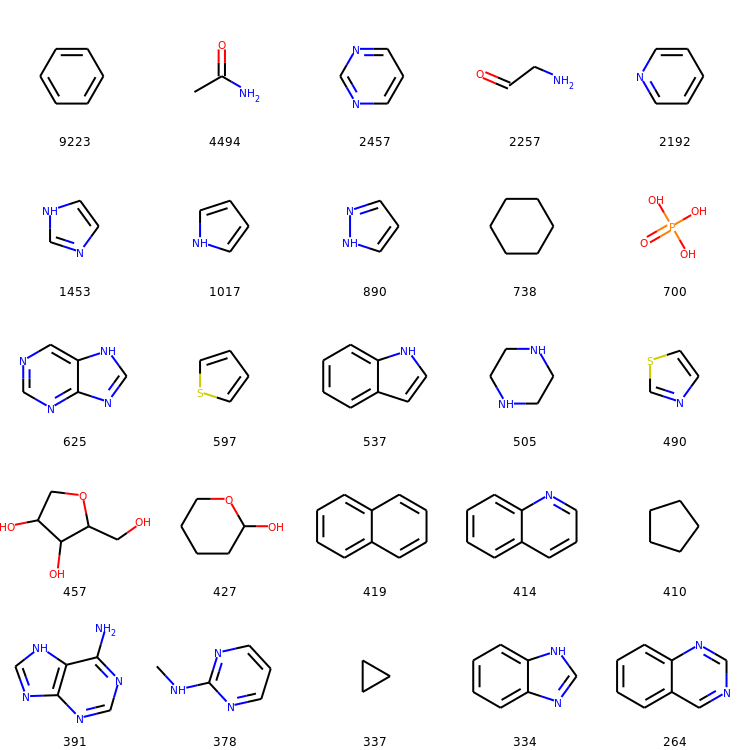

In [301]:
Draw.MolsToGridImage(create_25_mol(sortedfragments_drug), molsPerRow=5, subImgSize=(150,150), 
                                   legends = create_25_label(sortedfragments_drug))

# Cofactor - Scaffolds

In [302]:
cofactor_scaffold = pd.read_csv('cofactor_scaffold.csv')

In [303]:
cofactor_scaffold.head()

,CHEM_COMP_ID,SMILES
0,01A,O=C(CCCO[PH](=O)O[PH](=O)OC[C@H]1CC[C@@H](n2cnc3cncnc32)O1)NCCC(=O)NCCSCC(=O)c1ccccc1
1,01K,c1ncc2ncn([C@@H]3CCCO3)c2n1
2,0AF,c1ccc2[nH]ccc2c1
3,0ET,c1ncc2ncn([C@H]3CCCO3)c2n1
4,0HG,c1ccccc1


In [304]:
sorted_data_cofactor = cofactor_scaffold.groupby(['SMILES']).count().sort_values('CHEM_COMP_ID', ascending= False)

cofactor_scaffold_count = sorted_data_cofactor.rename(columns={'CHEM_COMP_ID':'COUNT(*)'}).reset_index()

In [305]:
cofactor_scaffold_count.head(10)

,SMILES,COUNT(*)
0,c1ncc2ncn([C@H]3CCCO3)c2n1,52
1,c1ncc2ncn([C@@H]3CCCO3)c2n1,23
2,c1ccccc1,22
3,c1ncc(C[n+]2ccsc2)cn1,18
4,O=[PH](OC[C@@H]1CC[C@@H](n2cnc3cncnc32)O1)O[PH](=O)OC[C@@H]1CC[C@@H]([n+]2ccccc2)O1,10
5,c1ccncc1,7
6,C1=CC2=[N+]3C1=Cc1ccc4n1[Fe-2]31n3c(ccc3=CC3=[N+]1C(=C4)C=C3)=C2,6
7,O=C1C=CC(=O)C=C1,5
8,c1ncc(Cc2ccsc2)cn1,4
9,C=C1SC=CN1Cc1cncnc1,3


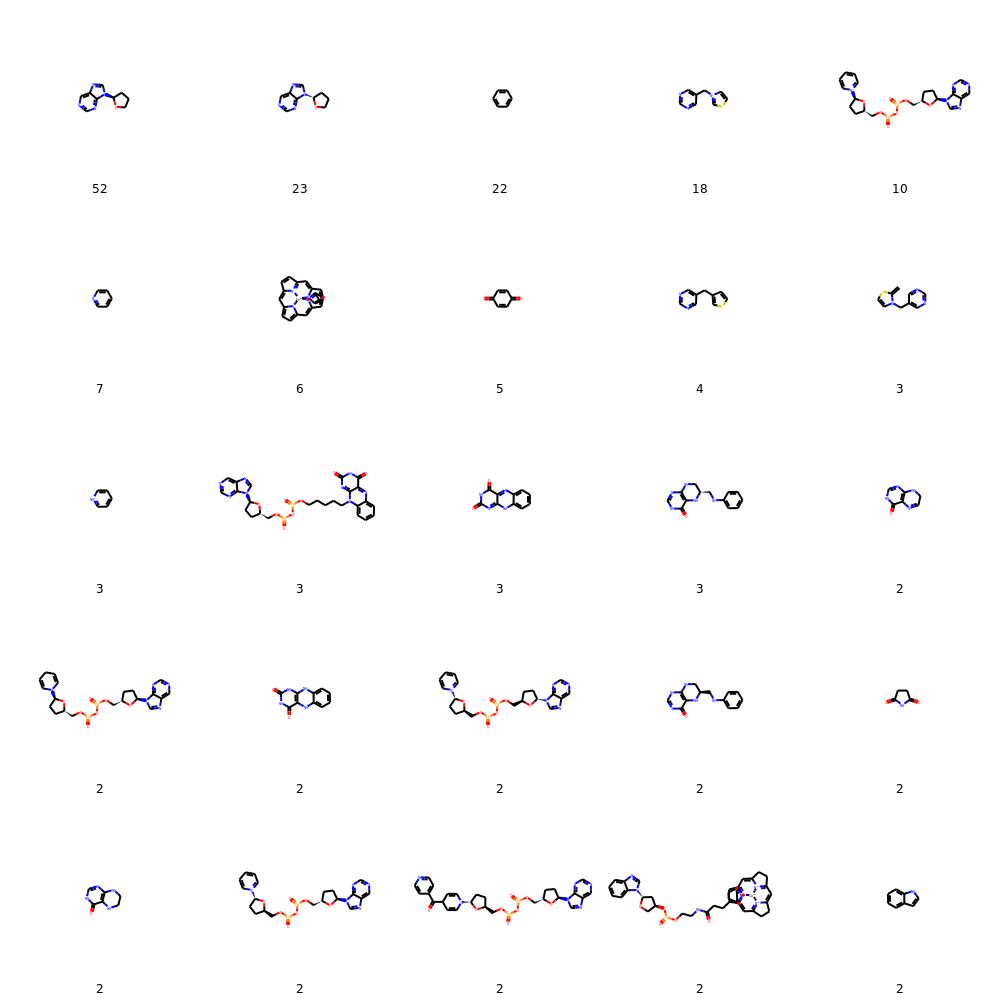

In [306]:
Draw.MolsToGridImage(create_25_mol(cofactor_scaffold_count), molsPerRow=5, subImgSize=(200,200), 
                                   legends = create_25_label(cofactor_scaffold_count))

# Biopterin cofactor scaffolds data

In [307]:
biopterin_scaffold = pd.read_csv('biopterin_scaffold.csv')

In [308]:
sorted_data_biopterin = biopterin_scaffold.groupby(['SMILES']).count().sort_values('CHEM_COMP_ID', ascending= False)

biopterin_scaffold_count = sorted_data_biopterin.rename(columns={'CHEM_COMP_ID':'COUNT(*)'}).reset_index()

In [309]:
biopterin_scaffold_count.nunique()

SMILES      20
COUNT(*)     3
dtype: int64

In [310]:
biopterin_scaffold_count.head()

,SMILES,COUNT(*)
0,c1ncc2ncn([C@H]3CCCO3)c2n1,47
1,c1ncc2ncn([C@@H]3CCCO3)c2n1,10
2,O=C(CCCO[PH](=O)O[PH](=O)OC[C@@H]1CC[C@@H](n2cnc3cncnc32)O1)NCCC(=O)NCCSC(=O)c1ccccc1,1
3,c1ncc2[nH]c[n+]([C@H]3CCCO3)c2n1,1
4,c1coc(-n2cnc3cncnc32)c1,1


In [311]:
biopterin_smiles = biopterin_scaffold_count['SMILES'].tolist()
biopterin_top5_scaffolds = biopterin_smiles[0:5]
top_5_mol = [Chem.MolFromSmiles(x) for x in biopterin_top5_scaffolds]

In [312]:
biopterin_count = biopterin_scaffold_count['COUNT(*)']
top5_scffold_count = biopterin_count[0:5]
top_5_biopterin_count_label = list(map(lambda l: str(l), top5_scffold_count))

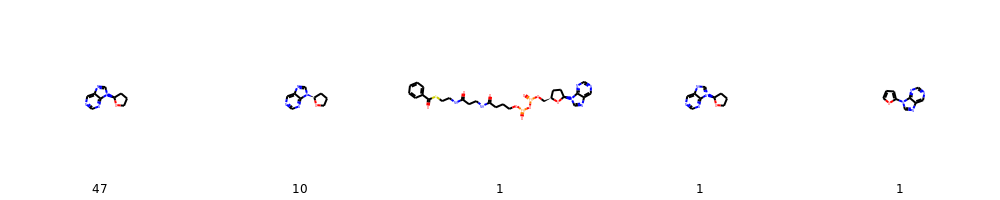

In [313]:
Draw.MolsToGridImage(top_5_mol, molsPerRow=5, subImgSize=(200,200), 
                                   legends = top_5_biopterin_count_label)

# CDK2 scaffolds

In [314]:
cdk2_scaffold = pd.read_csv('cdk2_scaffol.csv')

In [315]:
cdk2_scaffold.head()

,CHEM_COMP_ID,SMILES
0,LZC,c1cc2nc(NC3CCCCC3)ccn2n1
1,ZIP,c1ncc2nc[nH]c2n1
2,ES4,c1ncc2nc[nH]c2n1
3,HH5,c1ncc2[nH]cnc2n1
4,JYM,c1nc(OCC2CCCCC2)c2nc[nH]c2n1


In [316]:
sorted_data_cdk2 = cdk2_scaffold.groupby(['SMILES']).count().sort_values('CHEM_COMP_ID', ascending= False)

cdk2_scaffold_count = sorted_data_cdk2.rename(columns={'CHEM_COMP_ID':'COUNT(*)'}).reset_index()

In [317]:
cdk2_scaffold_count.head()

,SMILES,COUNT(*)
0,O=C(c1ccccc1)c1cnc(Nc2ccccc2)s1,14
1,c1ccc(NCc2cccnc2)cc1,11
2,c1ccc(Nc2nccc(-c3cncs3)n2)cc1,11
3,c1ccc(-c2ncncn2)cc1,6
4,c1ccc(Nc2ccnc(Nc3ccccc3)n2)cc1,6


In [318]:
cdk2_scaffold_count.nunique()

SMILES      211
COUNT(*)      8
dtype: int64

In [319]:
cdk2_smiles = cdk2_scaffold_count['SMILES'].tolist()
cdk2_top10_scaffolds = cdk2_smiles[0:10]
top_10_mol = [Chem.MolFromSmiles(x) for x in cdk2_top10_scaffolds]

In [320]:
cdk2_count = cdk2_scaffold_count['COUNT(*)']
top10_scffold_count = cdk2_count[0:10]
top_10_cdk2_count_label = list(map(lambda l: str(l), top10_scffold_count))

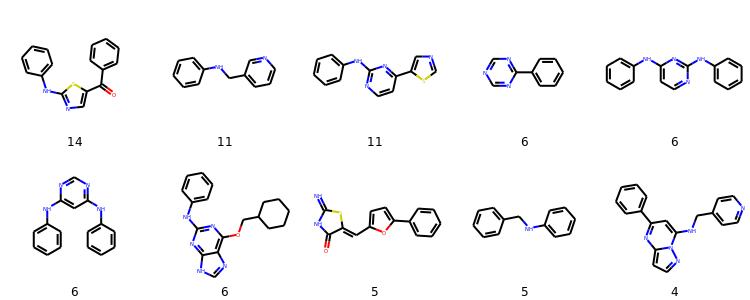

In [321]:
Draw.MolsToGridImage(top_10_mol, molsPerRow=5, subImgSize=(150,150), 
                                   legends = top_10_cdk2_count_label)